# Phase 3 Code Challenge Review

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [51]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
import graphviz

## Part 1: Gradient Descent

### Set Up

In [52]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [53]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


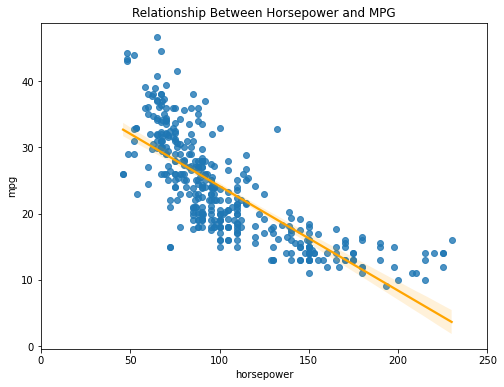

In [54]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [148]:
#This chart shows the slope as x vs the RSS results as y. it tells us ideal slope where our RSS is minimal (the 
# lowest point of the parabola)


# Optimization technique Gradient descent optimization. Minimizes cost(Here RSS) by finding the optimal slope. 
# Showing the Cost funtion, holding the intercept constant
#  Ideal slope m = about -.0157




#Gradient Descent Optimizes the coefficents of your parameter by minimizing your error/cost

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [149]:
# Gradient descent works by taking a step and evaluating the slope of the line's tanget (the tangent line's
# derivative), evaluating which direction to go in then adjusting the step size and moving onward. 
# this is done until step size is small and the slope of the line's tangent is as close to 0 as possible

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [150]:
# Step size is how far x we move to evaluate the slope. The step is preportional to the slope at that point 
#  witht the constant of preportionality known as the learning rate.

# Step size is the amount of change in your coefficent. Larger step sizes for higher slopes, as slope goes to 0,
# steps size gets smaller

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [151]:
# Logistic regression is used for categorical/discrete classification

# prediction is the log odds which are translated into probabilities 
#  logistic model puts out the log of the coefficent. to get the true coeff. you have to 
# exponentiate the results. linear predcts a continuos target
# It differs from linear regression in that it works with categorical targets, it is on a scale of 0 to 1
# is a parametric model. gives you coefficents /paramaerters

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [152]:
# Logistic regression is  less suseptable to overfitting than k Nearest Neighbor models or d-trees. 
# Logistic can handle larger datasets than knn
# kNN is easier to set up and has not complicated training step than logistic regression. Decision trees give feature
# importance(more inferential). Dtrees don't care about mulitcolinearity, Dtrees and knn have lazy learning

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [153]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [154]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [155]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns = 'target', axis = 1)
y = mpg_class["target"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [156]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [157]:
y_train

363    0
180    0
119    0
307    0
219    0
      ..
71     1
106    0
270    0
348    0
102    1
Name: target, Length: 262, dtype: int64

#### Part 1: explore the target column breakdown in train data

In [158]:
# Code to explore
pd.DataFrame(y_train).value_counts()

target
0         195
1          67
dtype: int64

In [159]:
67/(195+67)

0.25572519083969464

#### Part 2: What would a model-less baseline look like in this context?

#### Answer: Our baseline without a model would chooses the majority class (0) every time.



#### Part 3: How accurate would that baseline be on test data?


In [160]:
# accuracy = TP/(TP+FN)
display(pd.DataFrame(y_test).value_counts())


display(98/(98+32))

target
0         98
1         32
dtype: int64

0.7538461538461538

#### Answer: 75.4% accurate

### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [161]:
# On this breakdown We are not getting any True positives detected. We are also on a boarderline class embalance. 
#  We could use a more complex model or undersample our O's or SMOTE to oversample the minority class



# 
# 
# 

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [105]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42)

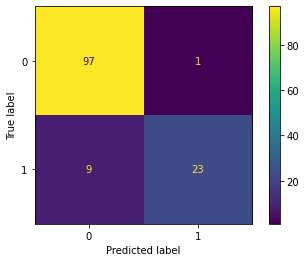

In [130]:
# Plot a confusion matrix on the test data


from sklearn.metrics import plot_confusion_matrix
logreg.fit(X_train_scaled, y_train)
y_log_pred = logreg.predict(X_test_scaled)

plot_confusion_matrix(logreg, X_test_scaled, y_test)


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [136]:
# call_on_students(1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tp = 23
fp = 1
tn = 97
fn = 9

In [132]:
# Accuracy
accuracy_score(y_test, y_log_pred)

0.9230769230769231

In [133]:
# Precision
precision_score(y_test, y_log_pred)

0.9583333333333334

In [134]:
# Recall
recall_score(y_test, y_log_pred)

0.71875

In [135]:
# F1-Score
f1_score(y_test, y_log_pred)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [112]:

from sklearn.metrics import plot_roc_curve, roc_auc_score

y_prob = logreg.predict_proba(X_test_scaled)
y_hat = y_prob[:, 1]

roc_auc_score(y_test, y_hat)


0.9811862244897959

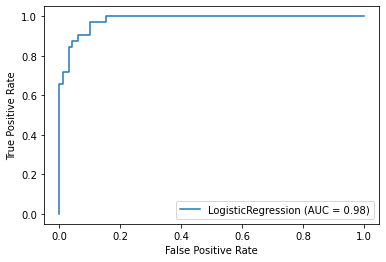

In [113]:
plot_roc_curve(logreg, X_test_scaled, y_test);


### 12) Evaluate! Based on the metrics of our test data, how is our model doing?


So far Our model seems to be doing ok with high accuracy and precision, Recall and F1 are somewhat low. 


AUC is excellent at 98%. Evalation depends on the business question

On AUC alone precision is better than recall TPR higher than FPR

## Part 4: Decision Trees

### Set Up

In [114]:
# Helper function
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [115]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [138]:
# Tree based on 1st column
# plot_tree(dt_maxdepth1_v1, ['weight'])

In [117]:
# Tree based on 2nd column
# plot_tree(dt_maxdepth1_v2, ['origin'])

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [140]:
# The first tree splits the data better as its gini scores show a lower level on entropy on both sides
# and therefore a hogher purity of both resulting leaves

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [141]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

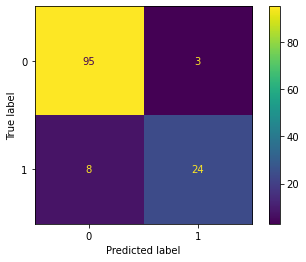

In [142]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test)

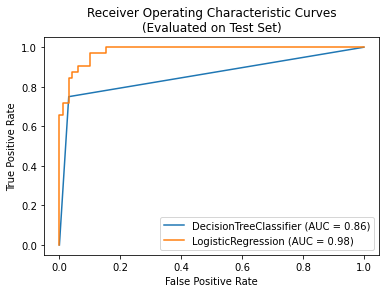

In [143]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [144]:
# Based Purely on ROC-AUC Score the Logistic regression performs better as it's AUC is 98% vs the the D_Tree's 86%

# This more area under the cureve higher True Positive Rate and Lower False Positive Rate